In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from scipy import misc
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization


import os
print(os.listdir("../input/wheat/Wheat/positive"))

Using TensorFlow backend.


['DSC03163.JPG', 'DSC03312.JPG', 'DSC03172.JPG', 'DSC03313.JPG', 'IMG_2050.JPG', 'IMG_6680.JPG', 'DSC03321.JPG', 'DSC03305.JPG', 'IMG_6667.JPG', 'DSC03326.JPG', 'DSC03322.JPG', 'DSC03166.JPG', 'IMG_2006.JPG', 'DSC03233.JPG', 'IMG_2051.JPG', 'DSC03231.JPG', 'DSC03314.JPG', 'IMG_1966.JPG', 'DSC03174.JPG', 'IMG_1995.JPG', 'DSC03230.JPG', 'DSC03176.JPG', 'DSC03323.JPG', 'IMG_1994.JPG', 'DSC03327.JPG', 'DSC03173.JPG', 'DSC03309.JPG', 'IMG_1997.JPG', 'IMG_1998.JPG', 'IMG_2008.JPG', 'IMG_2049.JPG', 'DSC03235.JPG', 'IMG_2005.JPG', 'DSC03232.JPG', 'IMG_1959.JPG', 'DSC03279.JPG', 'DSC03175.JPG', 'IMG_1943.JPG', 'IMG_1993.JPG', 'DSC03316.JPG', 'DSC03229.JPG', 'IMG_2007.JPG', 'IMG_2004.JPG', 'IMG_1996.JPG', 'IMG_6668.JPG', 'DSC03325.JPG', 'DSC03181.JPG', 'IMG_1967.JPG', 'IMG_2020.JPG', 'DSC03228.JPG']


In [2]:
print(os.listdir("../input/wheat/Wheat"))

['negative', 'positive', 'Readme.txt']


**Loading postive images Positive for 1**

In [3]:
df_pos=pd.DataFrame()
pos=os.listdir("../input/wheat/Wheat/positive")
df_pos['path']=pos
df_pos['path']="../input/wheat/Wheat/positive/"+df_pos['path']
df_pos['Label']=1
print(df_pos.shape)
df_pos.head()


(50, 2)


,path,Label
0,../input/wheat/Wheat/positive/DSC03163.JPG,1
1,../input/wheat/Wheat/positive/DSC03312.JPG,1
2,../input/wheat/Wheat/positive/DSC03172.JPG,1
3,../input/wheat/Wheat/positive/DSC03313.JPG,1
4,../input/wheat/Wheat/positive/IMG_2050.JPG,1


**Loading Negative images/0 for Negative**

In [4]:
df_neg=pd.DataFrame()
neg=os.listdir("../input/wheat/Wheat/negative")

df_neg['path']=neg
df_neg['path']="../input/wheat/Wheat/negative/"+df_neg['path']
df_neg['Label']=0
print(df_neg.shape)
df_neg.head()



(319, 2)


,path,Label
0,../input/wheat/Wheat/negative/IMG_3115.JPG,0
1,../input/wheat/Wheat/negative/IMG_2039.JPG,0
2,../input/wheat/Wheat/negative/IMG_2336.JPG,0
3,../input/wheat/Wheat/negative/IMG_2337.JPG,0
4,../input/wheat/Wheat/negative/DSC06465.JPG,0


**Joining Dataframes positive and negative**

In [5]:
df=pd.DataFrame()
df['path']=df_neg['path'].append(df_pos['path'],ignore_index=True)
df['label']=df_neg['Label'].append(df_pos['Label'],ignore_index=True)
print(df.shape)
df.head()

(369, 2)


,path,label
0,../input/wheat/Wheat/negative/IMG_3115.JPG,0
1,../input/wheat/Wheat/negative/IMG_2039.JPG,0
2,../input/wheat/Wheat/negative/IMG_2336.JPG,0
3,../input/wheat/Wheat/negative/IMG_2337.JPG,0
4,../input/wheat/Wheat/negative/DSC06465.JPG,0


In [6]:
df.drop([206],axis=0,inplace=True)

**Visualizing healthy Positive images**

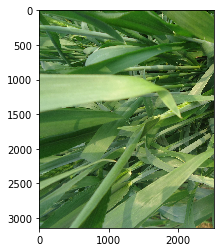

In [7]:

im = plt.imread(df_pos.path.values[39]) # reading Image from its path

plt.imshow(im)# show the image
plt.show()

****Visualizing affected images****

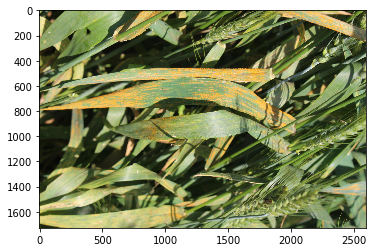

In [8]:

im = plt.imread(df_neg.path.values[22]) # reading Image from its path

plt.imshow(im)# show the image
plt.show()

**Checking label ratio**

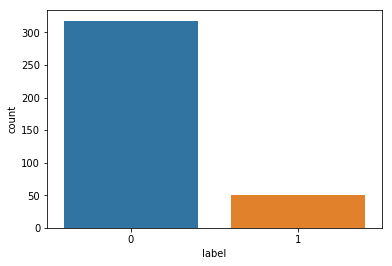

In [9]:
import seaborn as sns
sns.countplot(df['label'])

**Resizing image into 227*227**

In [10]:
img_lst=[]
label=[]
p=0
for i in df['path'].values:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array = Image.fromarray(img, 'RGB')
    resized_img = img_array.resize((227, 227))  

    print(p,resized_img)

    img_lst.append(np.array(resized_img))

    p=p+1  
    
for i in df['label'].values:
    label.append(i)
    print(i) 


0 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235940>
1 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
2 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
3 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
4 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235940>
5 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
6 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
7 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB62354A8>
8 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB5B3BCC0>
9 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
10 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB62354A8>
11 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235940>
12 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
13 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB5B3BCC0>
14 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
15 <P

124 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
125 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235940>
126 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
127 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB62354A8>
128 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
129 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB5B3BA90>
130 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB5B3B278>
131 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
132 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
133 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
134 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB62354A8>
135 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
136 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235940>
137 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB5B3BAC8>
138 <PIL.Image.Image image mode=RGB size=227x227

245 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
246 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
247 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
248 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235940>
249 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
250 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
251 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
252 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235940>
253 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB62354A8>
254 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
255 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235240>
256 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB6235940>
257 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
258 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB62354A8>
259 <PIL.Image.Image image mode=RGB size=227x227

366 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB4B06748>
367 <PIL.Image.Image image mode=RGB size=227x227 at 0x7F4EB62354A8>
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [11]:
images = np.array(img_lst)
labels = np.array(label)

In [12]:
images.shape
labels.shape

(368,)

**Displaying random images**

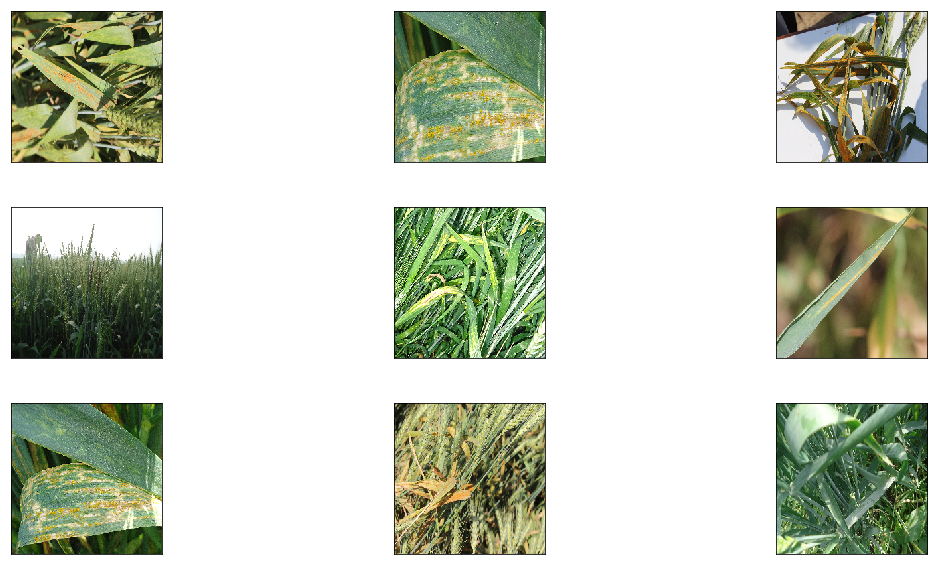

In [13]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        #plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [14]:
labels.shape

(368,)

In [15]:
#1-step in data shuffling
random_seed = 42
import random
#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In [16]:
#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (368, 227, 227, 3) 
Labels shape after shuffling =  (368,)


In [17]:
images = images.astype(np.float32)
#labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (368, 227, 227, 3)


**Splitting data into 70/30 ratio**

In [18]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (257, 227, 227, 3)
y_train shape =  (257,)

x_test shape =  (111, 227, 227, 3)
y_test shape =  (111,)


In [19]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())


model.add(Dense(1024,input_shape=(227,227,3),activation="relu"))

model.add(BatchNormalization())

model.add(Dense(1000,activation="relu"))
#model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(512,activation="relu"))
#model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(2,activation="softmax"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv

In [20]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
%%time
model.fit(x_train, y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
257/257 [==============================] - 4s 14ms/step - loss: 1.6836 - acc: 0.5058
Epoch 2/10
257/257 [==============================] - 0s 1ms/step - loss: 0.9433 - acc: 0.6226
Epoch 3/10
257/257 [==============================] - 0s 1ms/step - loss: 0.6330 - acc: 0.7471
Epoch 4/10
257/257 [==============================] - 0s 1ms/step - loss: 0.4299 - acc: 0.7899
Epoch 5/10
257/257 [==============================] - 0s 1ms/step - loss: 0.4340 - acc: 0.7977
Epoch 6/10
257/257 [==============================] - 0s 1ms/step - loss: 0.3550 - acc: 0.8677
Epoch 7/10
257/257 [==============================] - 0s 1ms/step - loss: 0.2625 - acc: 0.9300
Epoch 8/10
257/257 [==============================] - 0s 1ms/step - loss: 0.2394 - acc: 0.9377
Epoch 9/10
257/257 [==============================] - 0s 1ms/step - loss: 0.2271 - acc: 0.9222
Epoch 10/10
257/257 [==============================] - 0s 1ms/step - loss: 0.1877 - acc: 0.9416


In [22]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

111/111 [==============================] - 0s 3ms/step
0.5299010867471093 0.8108108124217471


In [23]:
pred = model.predict(x_test)

pred.shape

(111, 2)

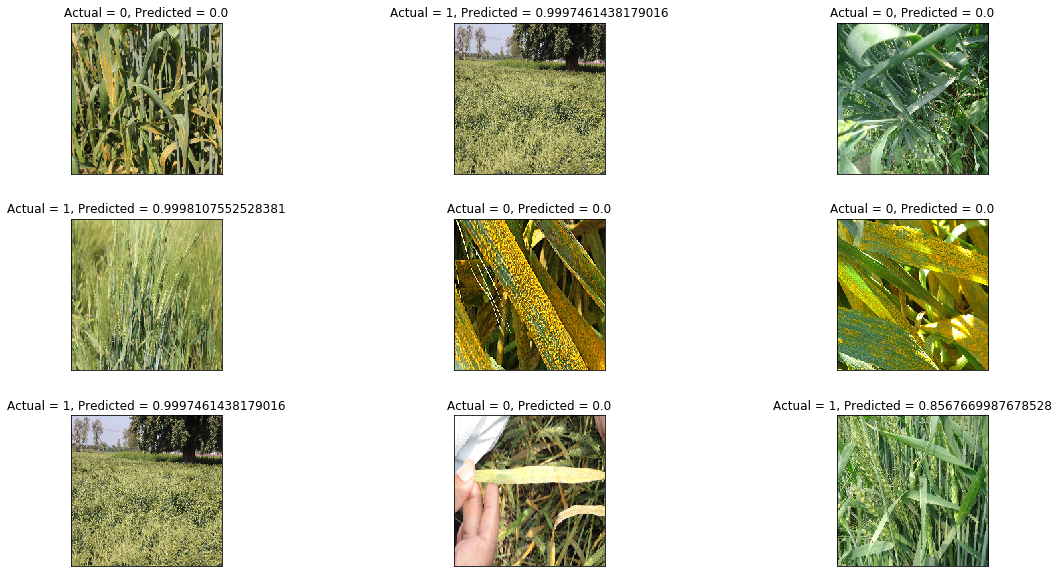

In [24]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [25]:
from keras.models import load_model

model.save_weights('kerasmodel.h5')  # creates a HDF5 file 'my_model.h5'

In [26]:
#json_string = model.to_json()

In [27]:
#model.save_weights('model_weights.h5')

# Save the model architecture
#with open('model_architecture.json', 'w') as f:
#    f.write(model.to_json())

In [28]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
